In [7]:
import numpy as np
#from matplotlib import pyplot as plt
#%matplotlib inline
#plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

## Plotting functions

In [2]:
def plot_error(statistic, errtag):
    
    res_dir = '../../clust/results_{}/'.format(statistic)
    GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))

    rads = np.linspace(2, 24, 12)
    plt.plot(rads, GP_error)
    plt.figure()
    plt.semilogy(rads, GP_error)

In [3]:
def plot_training(statistic, traintag, errtag='', subsample=None, version=None, nbins=9):
    plt.figure(figsize=(10,8)) 
    ps = []

    CC = range(0, 40)
    #CC = range(0,1)
    #HH = np.loadtxt("../CMASS/Gaussian_Process/GP/HOD_random_subsample_{}_version_{}.dat".format(subsample, version))
    #HH = np.atleast_2d(HH[0][:3])
    nhodnonolap = 100
    nhodpercosmo = 50
    #nhodpercosmo = 1
    HH = np.array(range(0,len(CC)*nhodnonolap))
    HH  = HH.reshape(len(CC), nhodnonolap)
    HH = HH[:,0:nhodpercosmo]
    
    res_dir = '../../clust/results_{}/'.format(statistic)
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    
    #color_idx = np.linspace(0, 1, np.max(HH)+1)
    color_idx = np.linspace(0, 1, len(CC))

    for cosmo in CC:
        HH_set = HH[cosmo]
        for hod in HH_set:
            zz = np.random.randint(len(HH.flatten()))
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[cosmo])
            fn = '{}training_{}{}/{}_cosmo_{}_HOD_{}_test_0.dat'.format(res_dir, statistic, traintag, statistic, cosmo, hod)
            r, p = np.loadtxt(fn, delimiter=',',unpack=True)
            #plt.semilogy(n, p, marker='o')
            #plt.errorbar(n, p, yerr=pstd, fmt='o')
            if errtag:
                plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                             zorder=zz)
            else:
                plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
                
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    plt.ylabel(r"P$_U$(r)")

In [4]:
def plot_testing(statistic, testtag, errtag='', nbins=9):
    plt.figure(figsize=(10,8)) 
    ax = plt.gca()

    CC_test = range(0, 7)
    #HH_test = range(0, 10)
    HH_test = [0, 6, 10, 11, 14, 16, 19, 20, 23, 24]#, 25, 26, 27, 28, 29, 32, 33, 38, 41, 43, 44, 47, 
               #50, 52, 57, 58, 59, 60, 64, 68, 71, 72, 74, 75, 77, 81, 82, 83, 84, 85, 87, 91, 97, 99] #good hods  

    res_dir = '../../clust/results_{}/'.format(statistic)
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    color_idx = np.linspace(0, 1, len(HH_test))
    boxes = range(5)
    
    
    for cosmo in CC_test:
        hodcount = 0
        for hod in HH_test:
            for box in boxes:
                hod = int(hod)
                colidx = hodcount
                color=plt.cm.rainbow(color_idx[colidx])

                idtag = '{}_cosmo_{}_Box_{}_HOD_{}_test_0.dat'.format(statistic, cosmo, box, hod)
                fnt = '{}testing_{}{}/{}'.format(res_dir, statistic, testtag, idtag)
                #fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)

                ntest, ptest = np.loadtxt(fnt, delimiter=',', unpack=True)
                if errtag:
                    plt.errorbar(ntest[:nbins], ptest[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color)
                else:
                    plt.plot(ntest[:nbins], ptest[:nbins], color=color, lw=0.5)
            hodcount += 1
                   
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    plt.ylabel(r"P(r)")
    ax.legend()

In [18]:
def plot_accuracy(statistic, acctag, hod=None, subsample=None, version=None, errtag=None, nbins=9, remove=None,
                 plot_wrt_mean=True):
    
    if plot_wrt_mean:
        ncols = 4
    else:
        ncols = 3
    fig, ax = plt.subplots(ncols, 1, figsize=(10,15), gridspec_kw={'height_ratios': [1]*ncols})

    CC_test = range(0, 7)
    HH_test = range(0, 10)
    if remove:
        for rval in remove:
            #HH_test.remove(rval)
            CC_test.remove(rval)
    #HH_test = np.array([0,1,2,3,4,6,7,8,9])
    #HH_test = [0, 6, 10, 11, 14, 16, 19, 20, 23, 24]#, 25, 26, 27, 28, 29, 32, 33, 38, 41, 43, 44, 47, 
               #50, 52, 57, 58, 59, 60, 64, 68, 71, 72, 74, 75, 77, 81, 82, 83, 84, 85, 87, 91, 97, 99] #good hods  
    upf_mean = np.zeros(nbins)
    fracerrs = []
    
    res_dir = '../../clust/results_{}/'.format(statistic)
    
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    
    
    for cosmo in CC_test:
        for hod in HH_test:
            hod = int(hod)
            if "mean" in acctag:
                idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
            else:
                idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)
            fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)
            ntest, ptest = np.loadtxt(fnt)
            upf_mean += ptest[:nbins]

            fnp = '../testing_results/predictions_{}{}/{}.dat'.format(statistic, acctag, idtag)
            npredic, ppredic = np.loadtxt(fnp)
            fracerr = (ppredic-ptest)/ptest
            fracerrs.append(fracerr)
            
    print('radii:', ntest)
    if errtag:
        print("Training error:", GP_error)
        
    upf_mean /= len(CC_test)*len(HH_test)
    #print "mean:",upf_mean    
    #color_idx = np.linspace(0, 1, len(CC_test)*len(HH_test))
    color_idx = np.linspace(0, 1, len(HH_test))

    i = 0
            
    fracerrs = np.array(fracerrs)
    std = np.std(fracerrs, axis=0)
    print("standard dev of fracerr:", std)
    
    for cosmo in CC_test:
        colidx = 0
        for hod in HH_test:
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[colidx])
            colidx += 1
            if "mean" in acctag:
                idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
            else:
                idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)
            fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)
            
            ntest, ptest = np.loadtxt(fnt)
            if i==0:
                ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color, label='testbox (actual)')
            else:
                ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)

            
            fnp = '../testing_results/predictions_{}{}/{}.dat'.format(statistic, acctag, idtag)
            npredic, ppredic = np.loadtxt(fnp)
            if i==0:
                ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color, label='emulator prediction')
            else: 
                ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color)
            ax[0].set_ylabel(r"P$_U$(r)")
            if cosmo==5 and hod==9:
                print(ppredic)
            
            idx_err = 1
            if plot_wrt_mean:
                ax[1].plot(ntest[:nbins], ptest[:nbins]/upf_mean[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
                ax[1].plot(npredic[:nbins], ppredic[:nbins]/upf_mean[:nbins], marker=None, ls='-', color=color)
                ax[1].set_ylabel(r"P$_v$/P$_{v,mean}$")
                idx_err = 2

            fracerr = (ppredic-ptest)/ptest
            #deltap_sigma = (ppredic-ptest)
            # PRINT BAD
            #if fracerr[8]>1:
            #    print(cosmo, hod)
            #fracerrs.append(fracerr)
            ax[idx_err].plot(ntest[:nbins], fracerr[:nbins], color=color)
            ax[idx_err].set_ylabel(r"(P$_{emulator}$-P$_{true}$)/P$_{true}$")
            #ax1.plot(ntest, ppredic/ptest)
            i += 1


    frac_rms = np.loadtxt("../testing_results/{}_testing_results{}.dat".format(statistic, acctag))
    
    #std = np.std(frac_rms, axis=0)
    #var = np.var(frac_rms, axis=0)
    #fracerrs = np.array(fracerrs)

    
    #std = np.std(fracerrs, axis=0)
    #print("standard dev of fracerr:", std)
    ax[idx_err+1].semilogy(ntest[:nbins], std[:nbins], color='g', label='prediction error')
    if errtag:
        ax[idx_err+1].semilogy(ntest[:nbins], GP_error[:nbins], color='r', label='training set error')
    ax[idx_err+1].set_ylabel("fractional error")
    ax[idx_err+1].legend()
                           
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    ax[0].legend()


## UPF

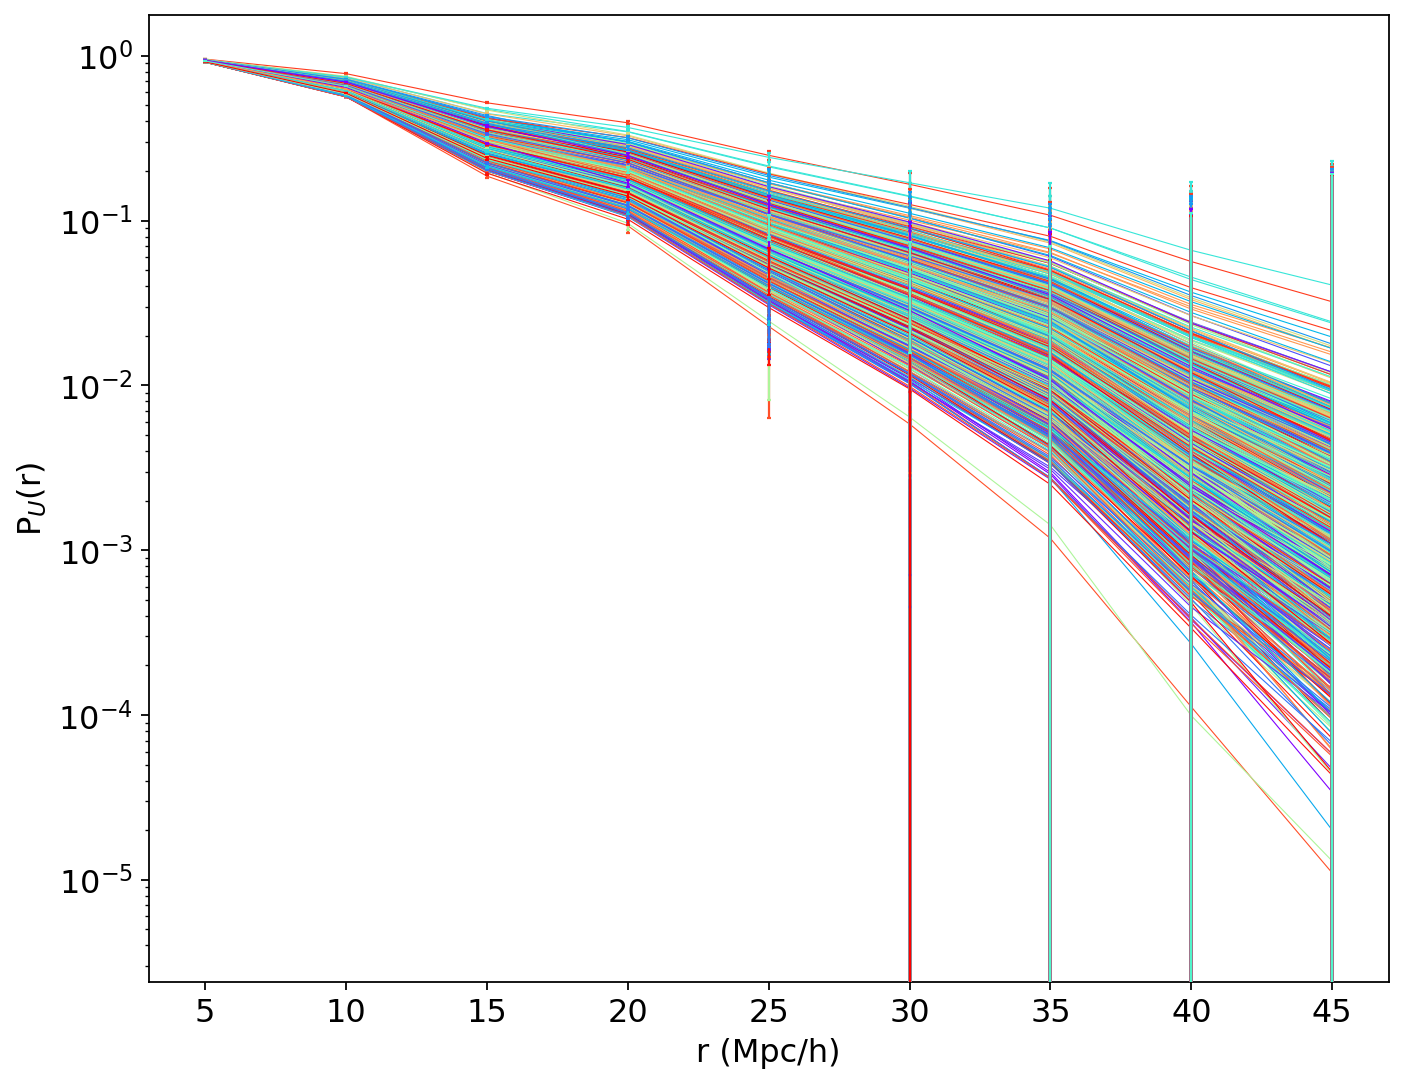

In [8]:
statistic='upf'
traintag = '_nonolap'
plot_training(statistic, traintag, errtag='_10hod_test0')

radii: [ 5. 10. 15. 20. 25. 30. 35. 40. 45.]
Training error: [0.00027332 0.00138898 0.00474205 0.00854407 0.01645155 0.02912254
 0.05004355 0.1052322  0.18863659]
standard dev of fracerr: [0.00055578 0.00474371 0.01351026 0.02456536 0.04288971 0.07477475
 0.11925671 0.20885699 0.3355882 ]
[0.93553942 0.68508315 0.36380622 0.23906073 0.11952063 0.06405445
 0.03296592 0.0114482  0.00449303]


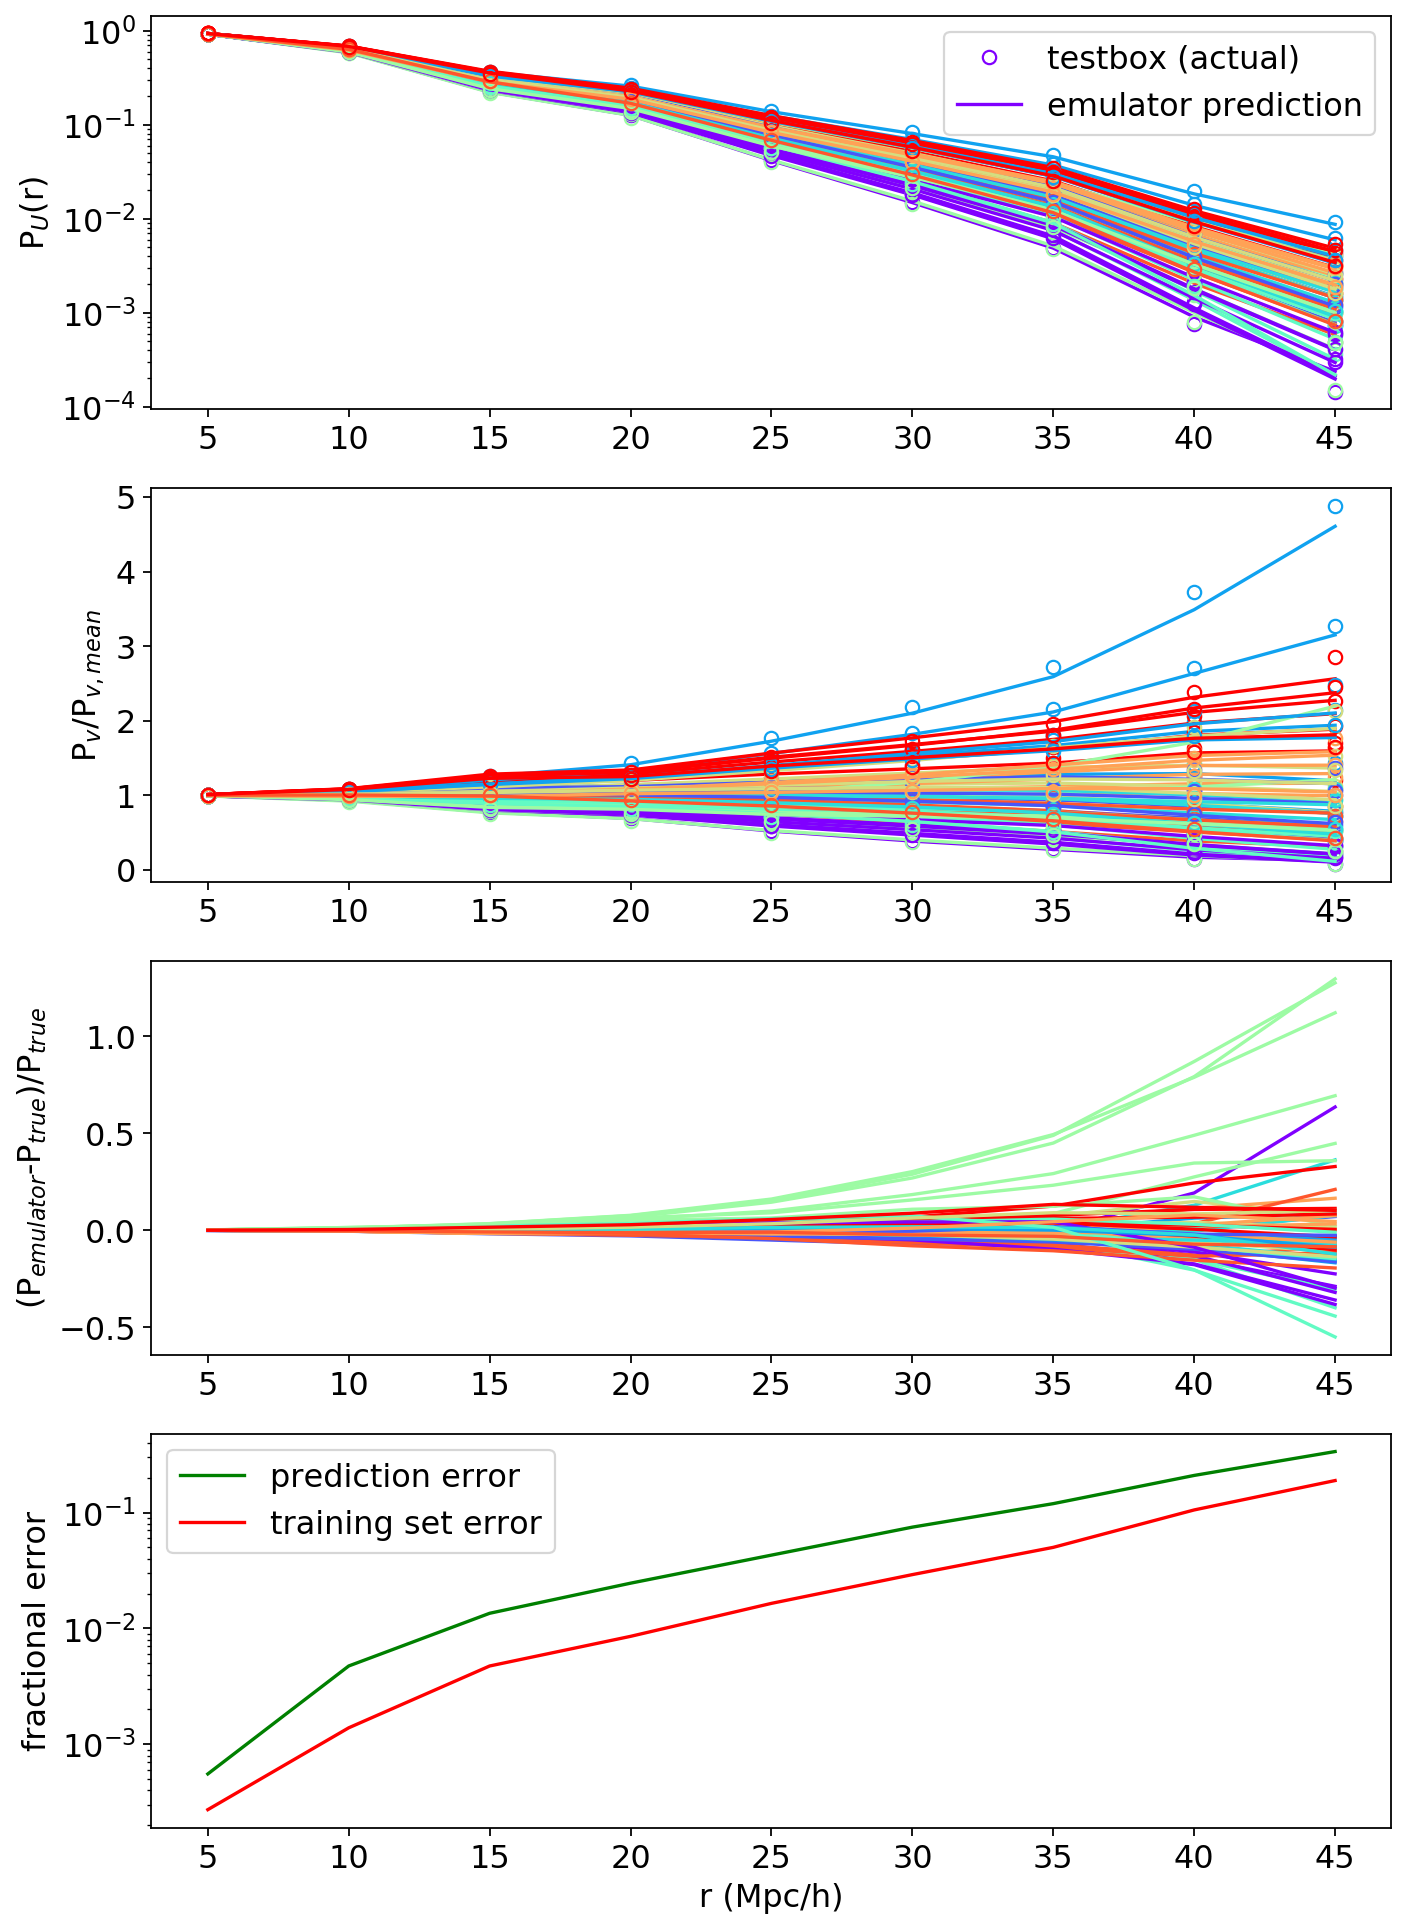

In [19]:
statistic='upf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag, nbins=9)

radii: [ 5. 10. 15. 20. 25. 30. 35. 40. 45.]
Training error: [0.00027332 0.00138898 0.00474205 0.00854407 0.01645155 0.02912254
 0.05004355 0.1052322  0.18863659]
3 5
4 5
[0.93553942 0.68508315 0.36380622 0.23906073 0.11952063 0.06405445
 0.03296592 0.0114482  0.00449303]
6 5
standard dev of fracerr: [0.00055578 0.00474371 0.01351026 0.02456536 0.04288971 0.07477475
 0.11925671 0.20885699 0.3355882 ]


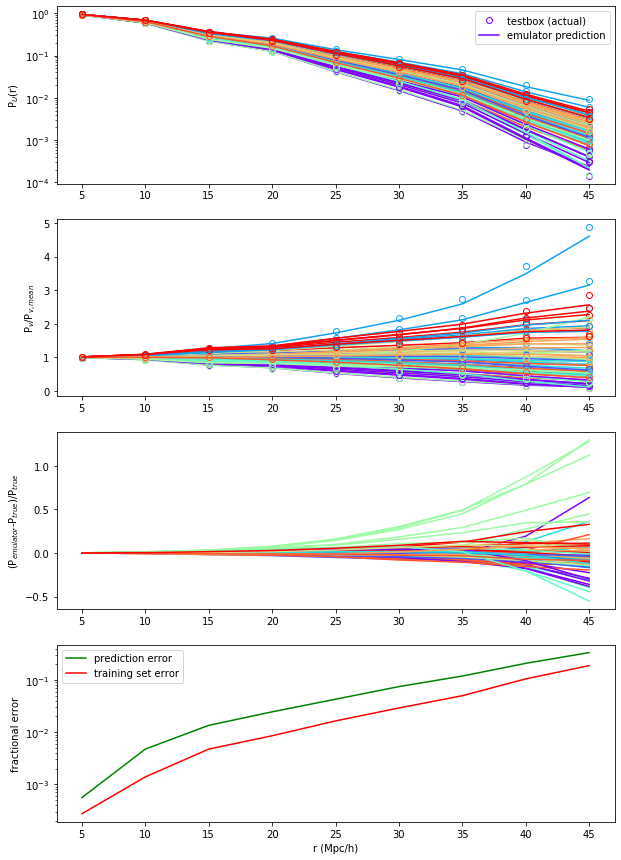

In [8]:
statistic='upf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag, nbins=9)

In [8]:
hods_test = np.loadtxt('../tables/HOD_test_np11_n1000_new_f_env.dat')
hods_test = hods_test[:10]

hods_train = np.loadtxt('../tables/HOD_design_np11_n5000_new_f_env.dat')
nhodnonolap = 100
nhodpercosmo = 50
ncosmos = 40
HH = np.array(range(0,ncosmos*nhodnonolap))
HH  = HH.reshape(ncosmos, nhodnonolap)
HH = HH[:,0:nhodpercosmo]
hods_train = hods_train[HH.flatten()]

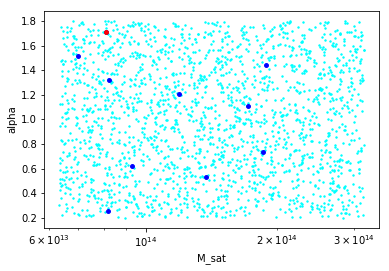

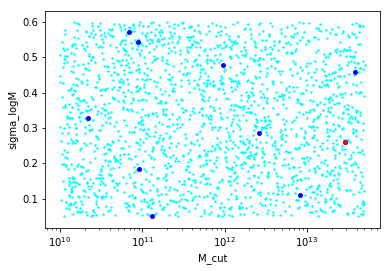

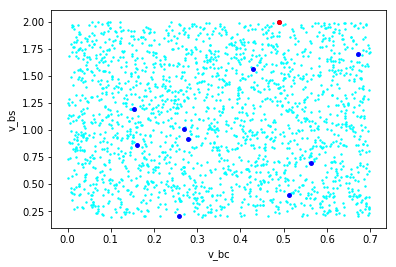

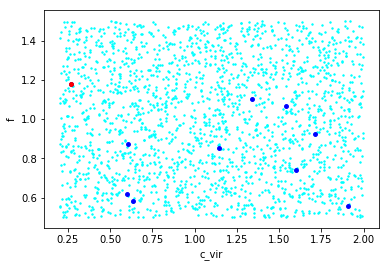

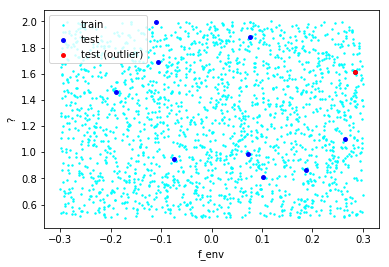

In [9]:
bad = 5

cols = ['M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', '?', '?']


pairs = [(0, 1),(2,3),(4,5),(6,7),(8,9)]
for pair in pairs:
    plt.figure()
    x = pair[0]
    y = pair[1]
    plt.scatter(hods_train[:,x], hods_train[:,y], color='cyan', label='train', s=2)
    plt.scatter(hods_test[:,x], hods_test[:,y], color='blue', label='test', s=15)
    plt.scatter(hods_test[bad,x], hods_test[bad,y], color='red', label='test (outlier)', s=15)
    if cols[x]=='M_sat' or cols[x]=='M_cut':
        plt.xscale('log')
    if cols[y]=='M_sat' or cols[y]=='M_cut':
        plt.yscale('log')
    plt.xlabel(cols[x])
    plt.ylabel(cols[y])
plt.legend()

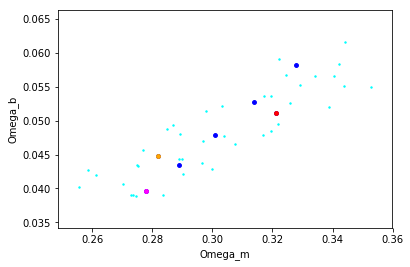

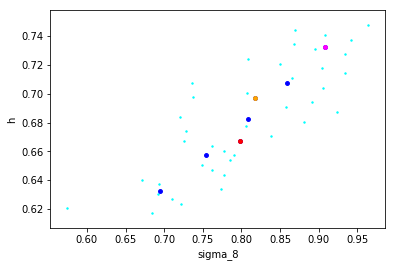

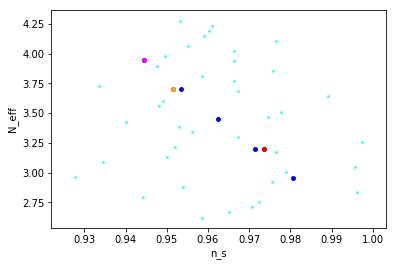

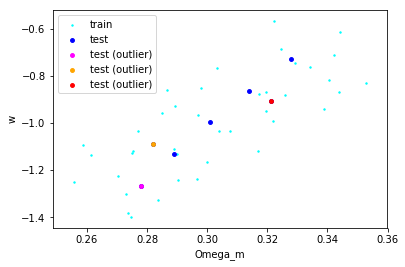

In [10]:
cosmos_train = np.loadtxt('../CMASS/Gaussian_Process/hod_file/cosmology_camb_full.dat')
cosmos_test = np.loadtxt('../CMASS/Gaussian_Process/hod_file/cosmology_camb_test_box_full.dat')

cols=['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w']

bads = [4,5,6]
badcols = ['magenta', 'orange','red']
pairs = [(0, 1),(2,3),(4,5),(0,6)]
for pair in pairs:
    plt.figure()
    x = pair[0]
    y = pair[1]
    plt.scatter(cosmos_train[:,x], cosmos_train[:,y], color='cyan', label='train', s=2)
    plt.scatter(cosmos_test[:,x], cosmos_test[:,y], color='blue', label='test', s=15)
    for i in range(len(bads)):
        bad = bads[i]
        plt.scatter(cosmos_test[bad,x], cosmos_test[bad,y], color=badcols[i], label='test (outlier)', s=15)
    if cols[x]=='M_sat' or cols[x]=='M_cut':
        plt.xscale('log')
    if cols[y]=='M_sat' or cols[y]=='M_cut':
        plt.yscale('log')
    plt.xlabel(cols[x])
    plt.ylabel(cols[y])
plt.legend()